In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Categorical.from_codes(data.target, data.target_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [97]:
#check missing values with isnull().any()
df.isnull().any()

,0
mean radius,False
mean texture,False
mean perimeter,False
mean area,False
mean smoothness,False
mean compactness,False
mean concavity,False
mean concave points,False
mean symmetry,False
mean fractal dimension,False


In [98]:
# Get statistical summary using df.describe()
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


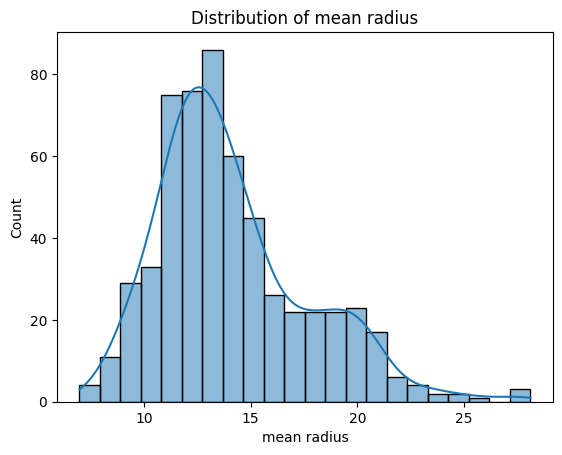

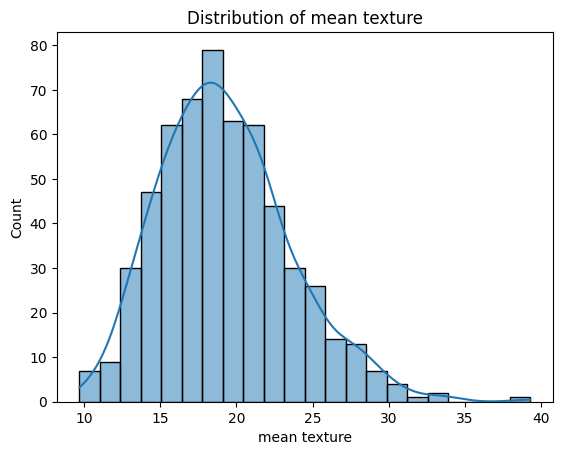

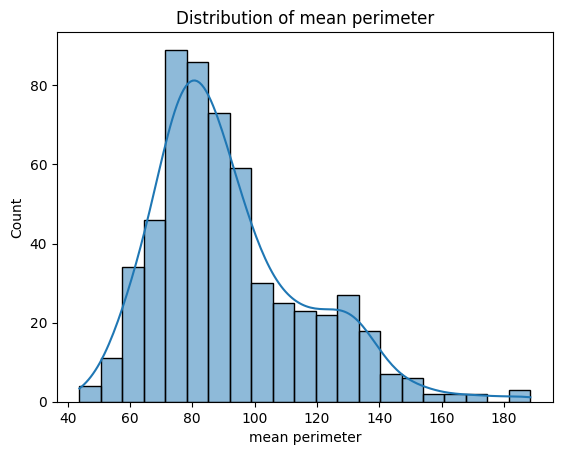

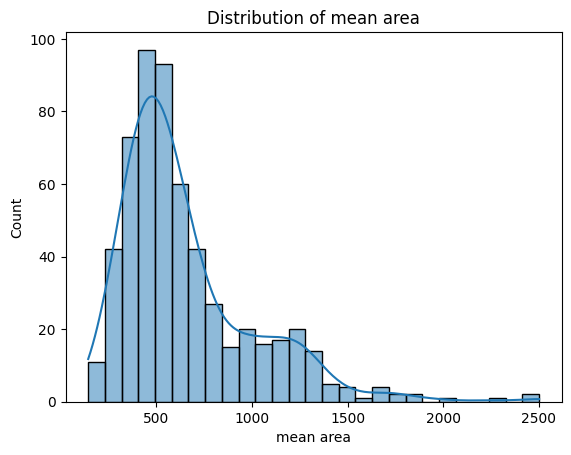

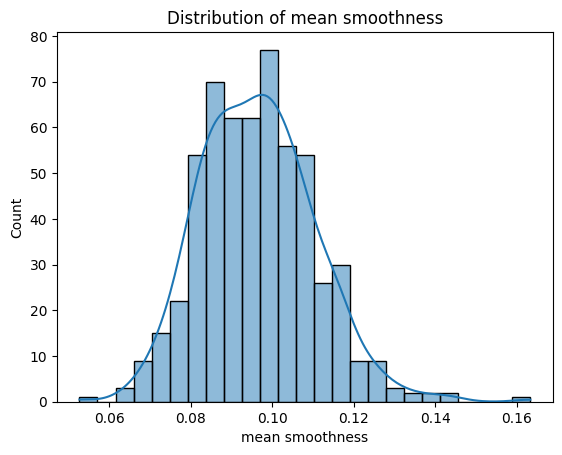

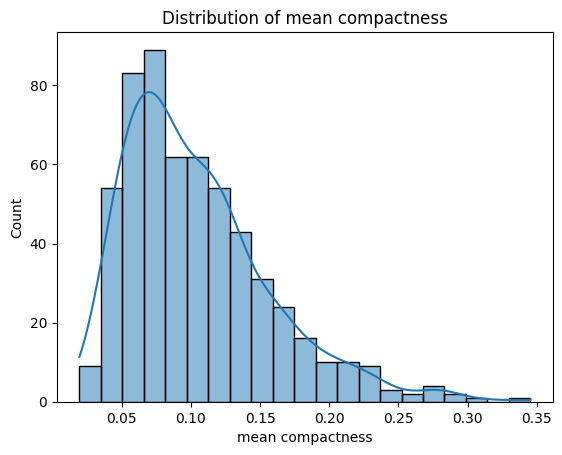

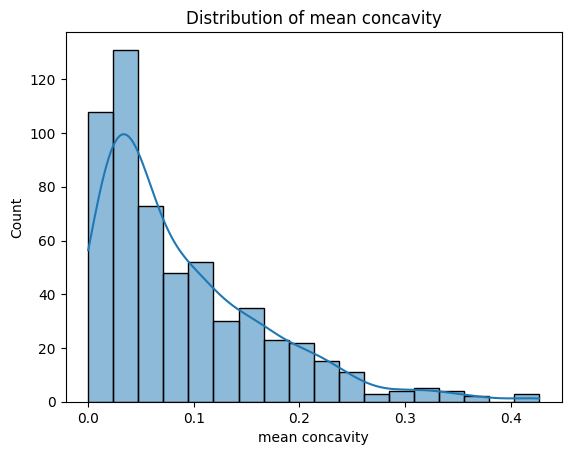

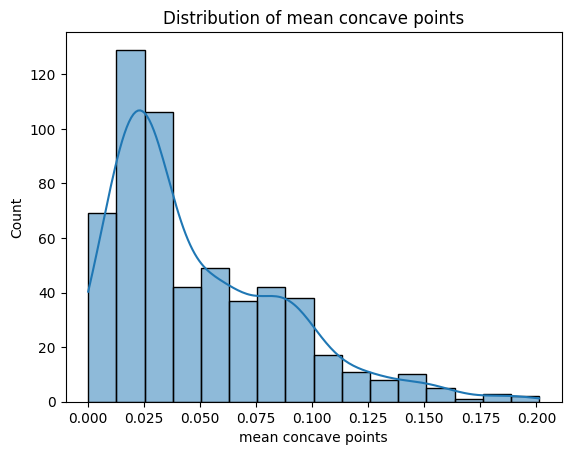

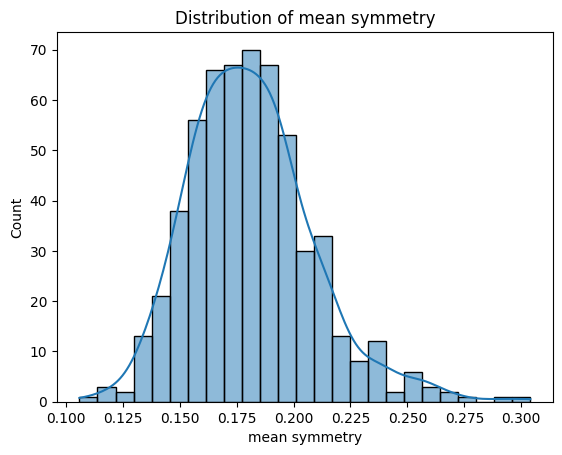

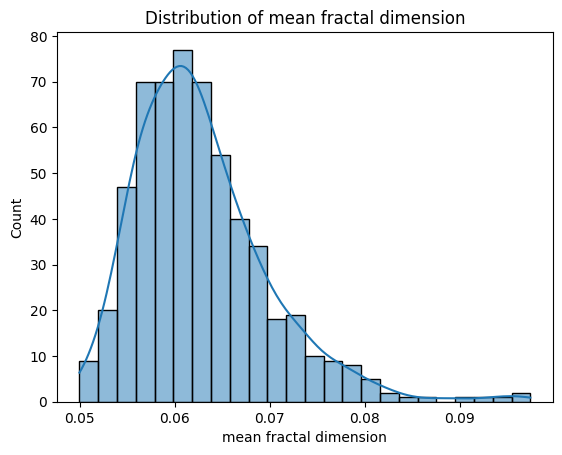

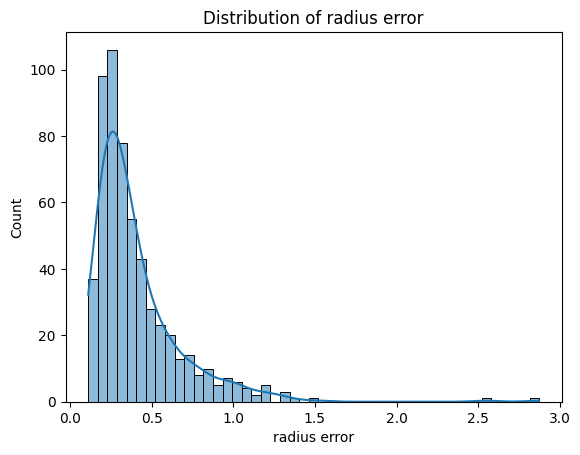

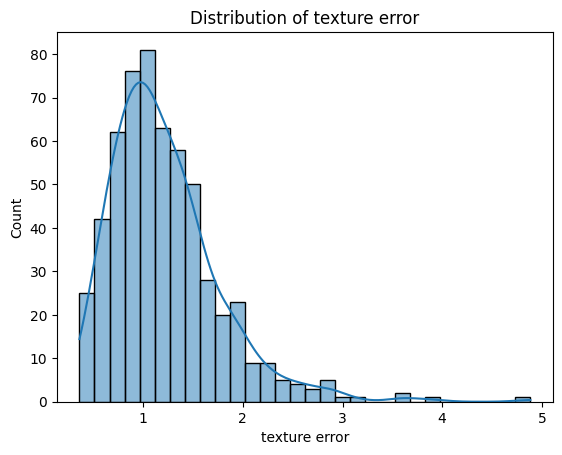

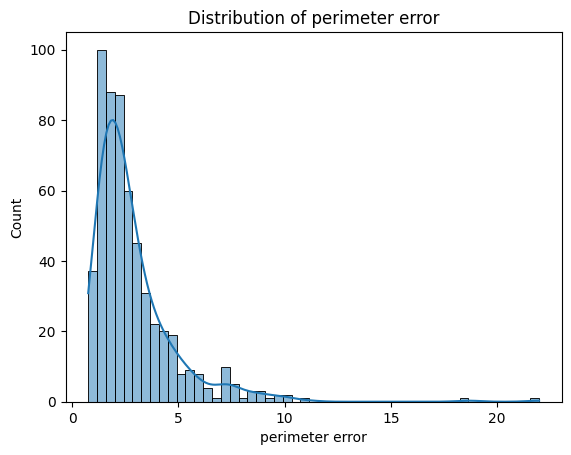

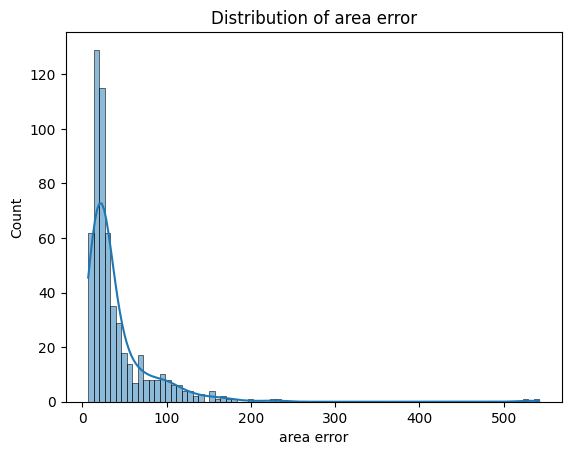

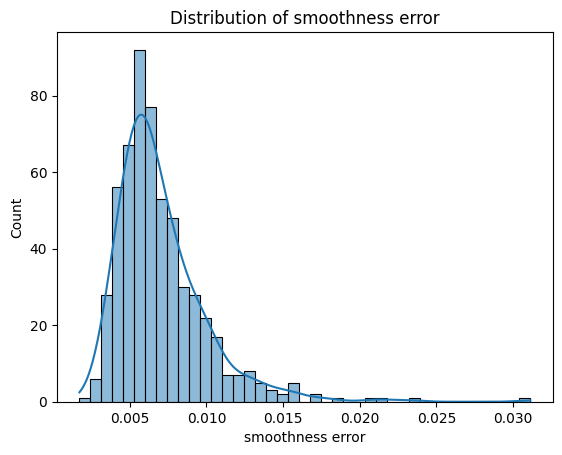

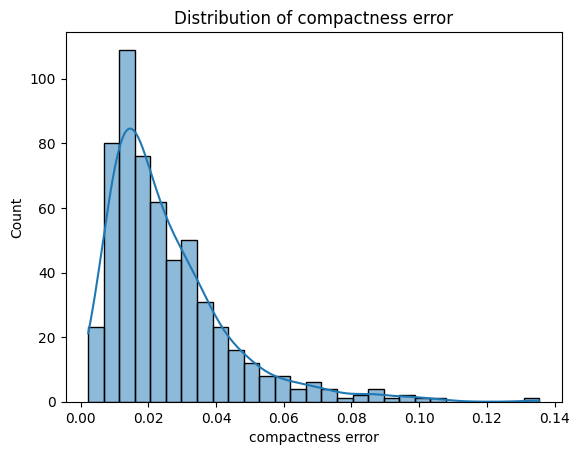

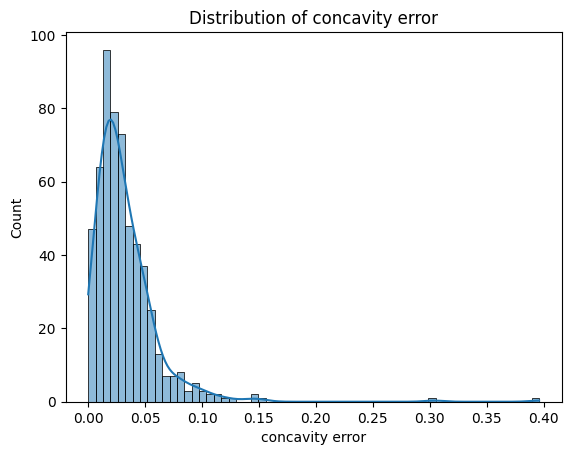

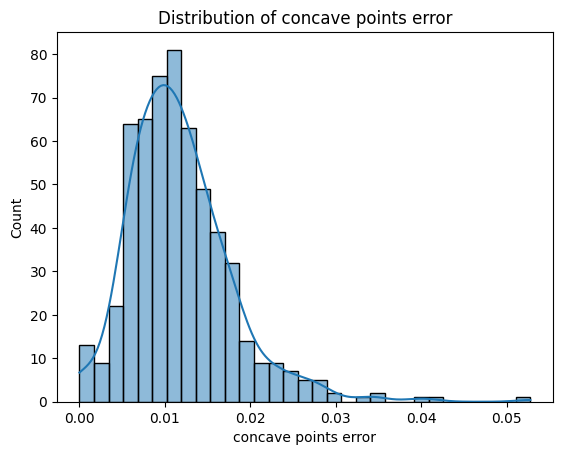

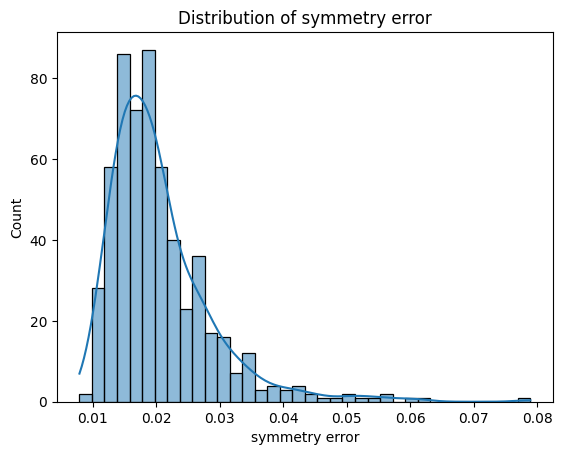

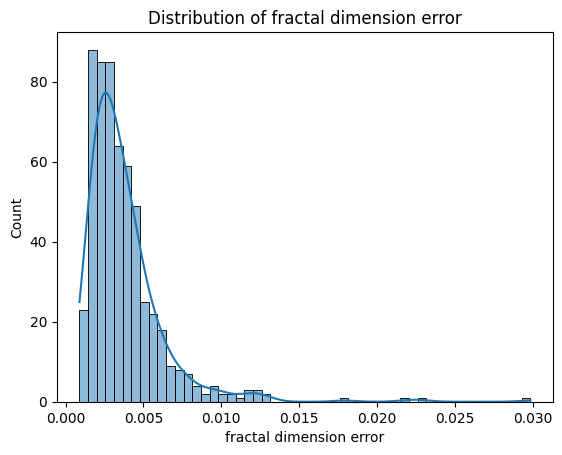

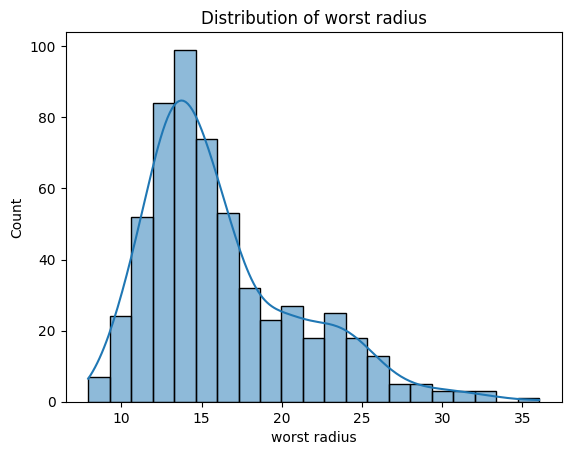

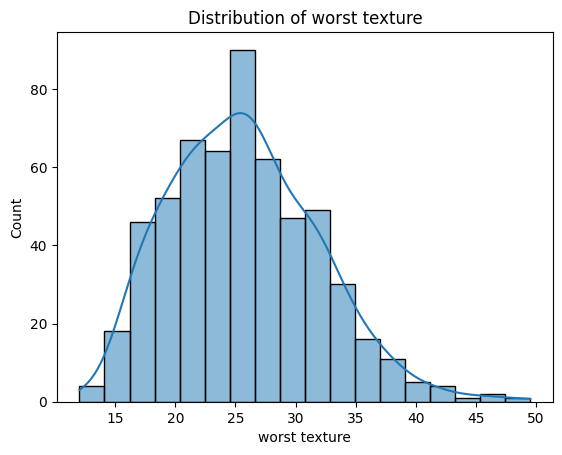

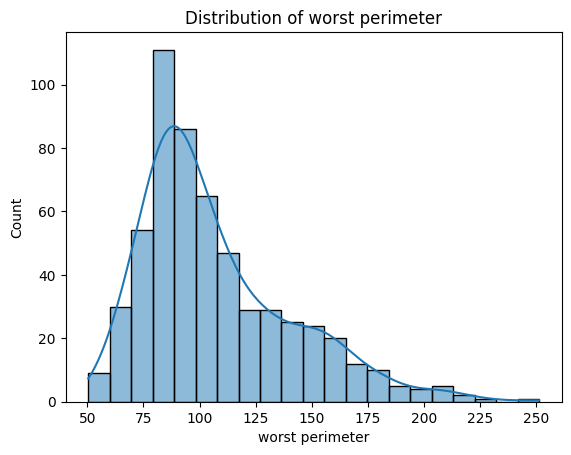

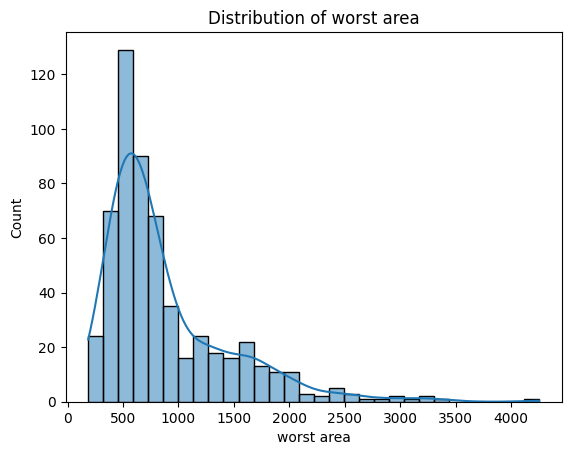

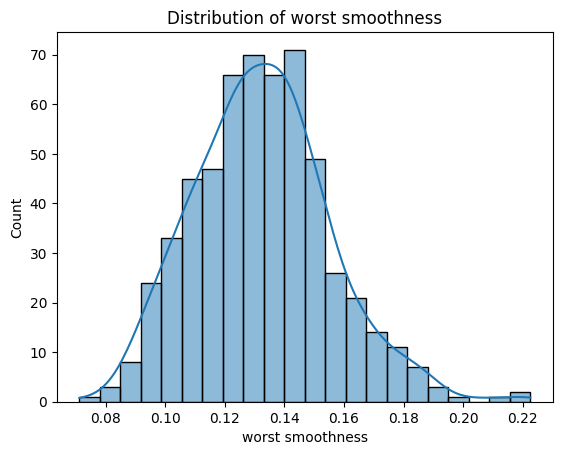

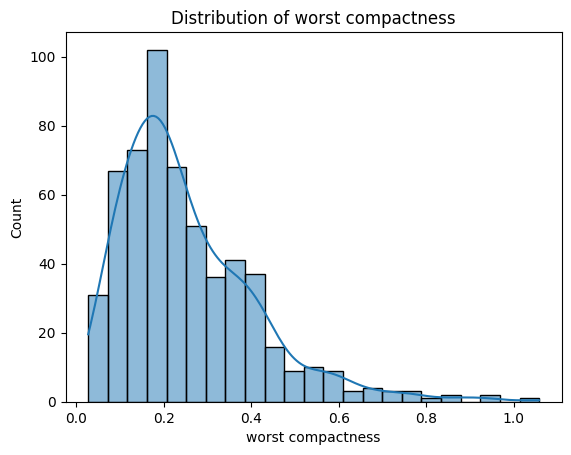

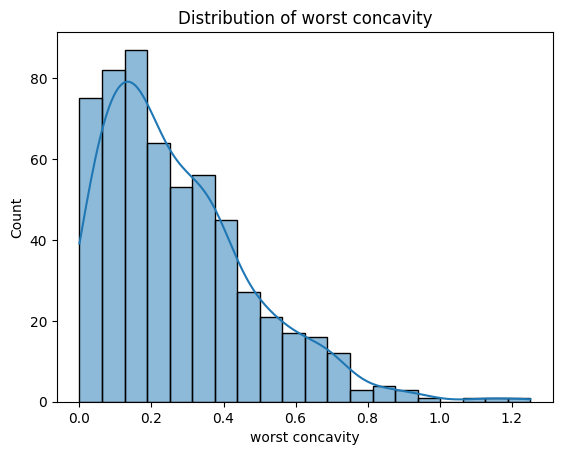

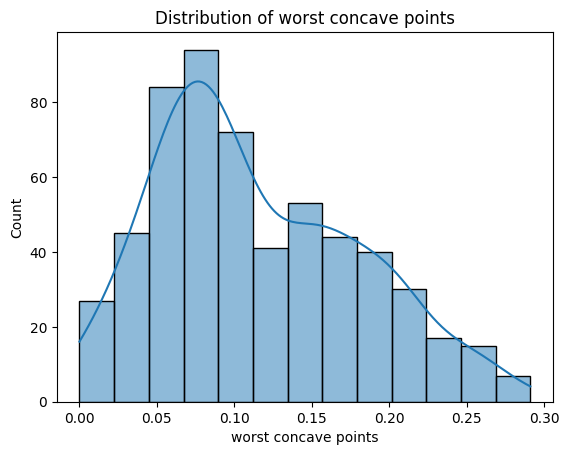

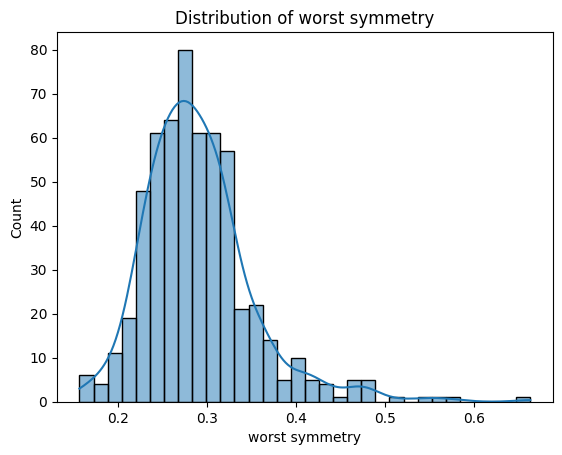

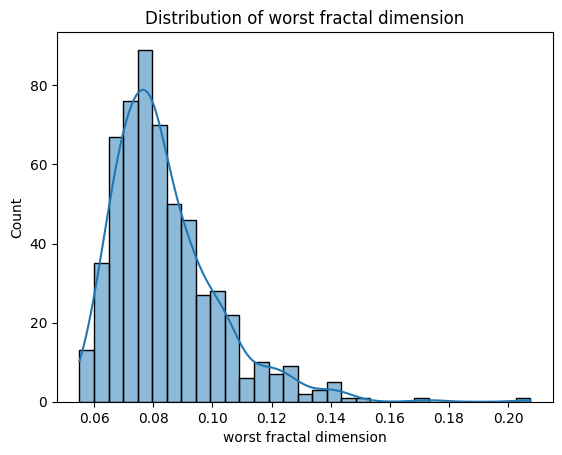

In [99]:
for column in df.columns[:-1]:
  sns.histplot(df[column], kde = True )
  plt.title(f'Distribution of {column}')
  plt.show()

In [106]:
# Compute the correlation matrix
corr_matrix = df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

ValueError: could not convert string to float: 'malignant'

In [72]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [15]:
# Apply SelectKBest to extract the top 10 features
selector = SelectKBest(score_func=chi2, k=10)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

In [16]:
# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area'],
      dtype='object')


In [21]:
# Create an SVC estimator
svc = SVC(kernel="linear")

In [22]:
# Use Recursive Feature Elimination
rfe = RFE(estimator=svc, n_features_to_select=10)
X_rfe = rfe.fit_transform(X_train, y_train)

In [23]:
# Get the ranking of the features
ranking = rfe.ranking_

In [26]:
# Print selected features
selected_features = X.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features)


Selected Features via RFE:
 Index(['mean radius', 'mean concavity', 'mean concave points', 'texture error',
       'worst radius', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')


In [28]:
# Create and train a linear SVM classifier
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
# Get the coefficients of the linear SVM
coefficients = np.abs(svc.coef_[0])

In [30]:
# Rank features based on coefficients
indices = np.argsort(coefficients)[::-1]

In [36]:
# Print the top 10 most important features
print("Top 10 Important Features Based on SVM Coefficients:")
for f in range(10):
    print(f"{data.feature_names[indices[f]]}: {coefficients[indices[f]]}")

Top 10 Important Features Based on SVM Coefficients:
worst concavity: 1.3640466192721585
mean radius: 0.9518217697057452
perimeter error: 0.7152980582478037
worst concave points: 0.6801237609470396
mean concavity: 0.6180401839665443
worst compactness: 0.5442586128707657
worst smoothness: 0.5392385990304887
worst symmetry: 0.5237918409211129
mean concave points: 0.385136355547102
mean smoothness: 0.2838680649693843


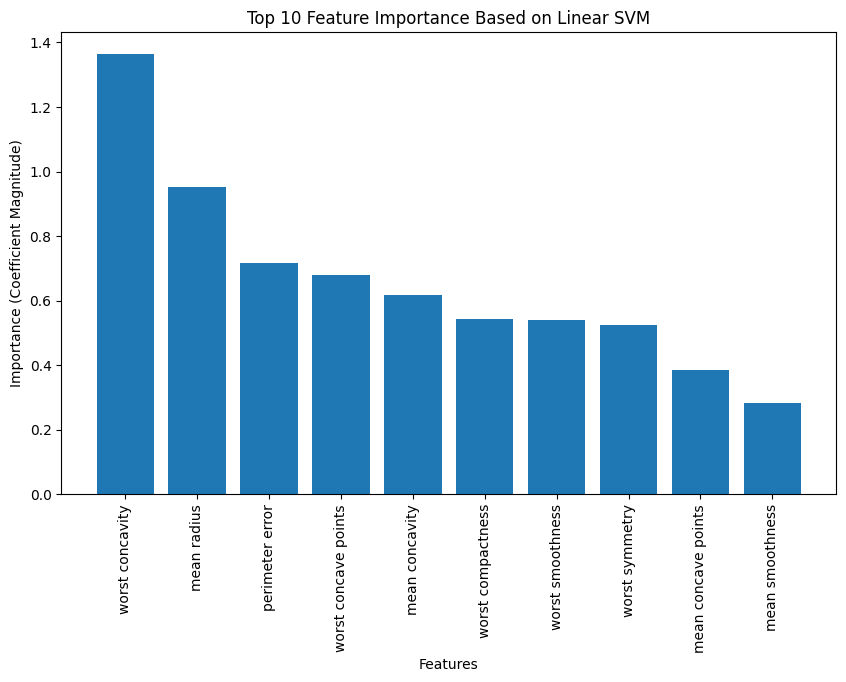

In [40]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importance Based on Linear SVM")
plt.bar(range(10), coefficients[indices[:10]], align="center")
plt.xticks(range(10), data.feature_names[indices[:10]], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance (Coefficient Magnitude)")
plt.show()

In [46]:
# Convert to a DataFrame for easier plotting
df = pd.DataFrame(X, columns= data.feature_names)
df['target'] = y

# Specify the indices of selected features
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area']

# Create a pair plot
sns.pairplot(df, hue='target', vars=selected_features)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

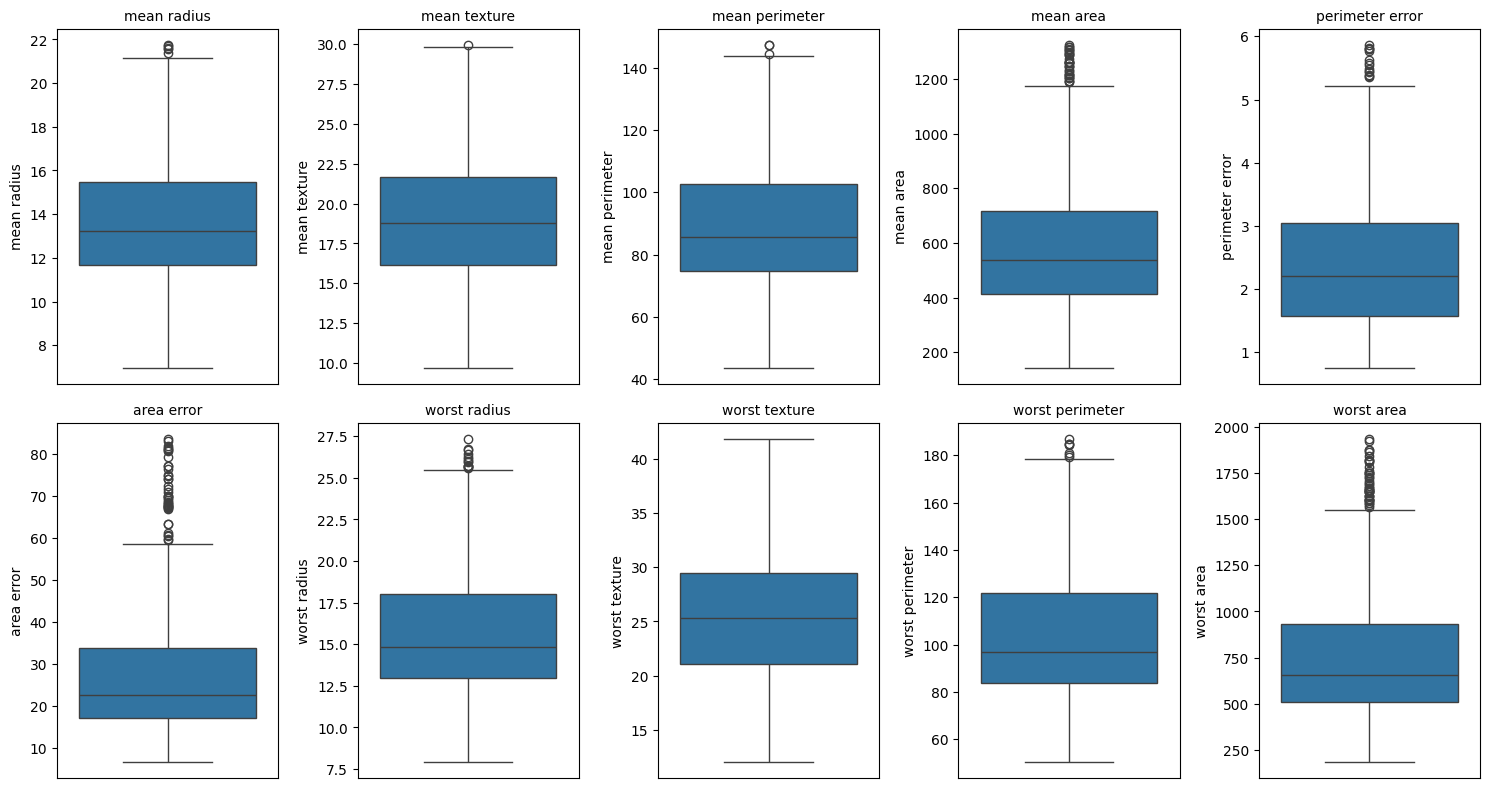

In [70]:
# Plot boxplots for selected features
plt.figure(figsize=(15, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 5, i + 1)  # Adjust subplot grid size based on the number of selected features
    sns.boxplot(df[feature])
    plt.title(feature, fontsize=10)
    plt.xticks([])  # Hide x-axis ticks for better readability

plt.tight_layout()
plt.show()

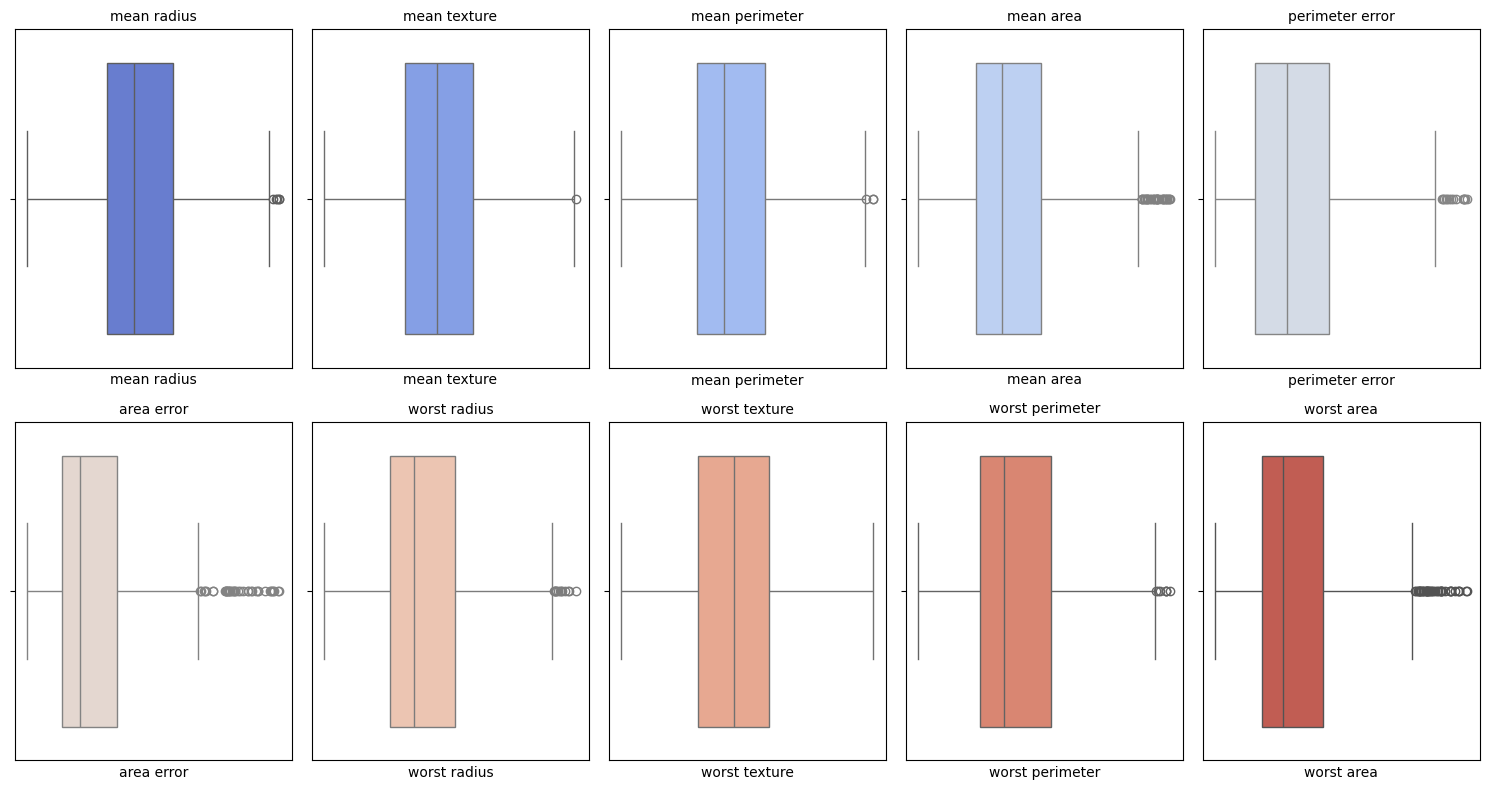

In [69]:
# Define colors manually for the plots
colors = sns.color_palette("coolwarm", len(selected_features))

# Plot boxplots for selected features with color
plt.figure(figsize=(15, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 5, i + 1)  # Adjust subplot grid size based on the number of selected features
    sns.boxplot(x=df[feature], color=colors[i])  # Apply color manually
    plt.title(feature, fontsize=10)
    plt.xticks([])  # Hide x-axis ticks for better readability

plt.tight_layout()
plt.show()

In [68]:
# Filter out outliers and keep only the valid data

column = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area']

# Calculate Q1, Q3 and IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#Train Test Split


In [86]:
feature_columns = data.feature_names  # This list contains the names of the feature columns
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df['target'], test_size=0.2,random_state=2)

In [87]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [88]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=2)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=2)

In [94]:
# Make predictions on the test set (X_test_scaled)
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy of the model is {accuracy}")

Accuracy of the model is 0.6140350877192983


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [93]:
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
[[69  0]
 [44  1]]
Classification Report:
               precision    recall  f1-score   support

      benign       0.61      1.00      0.76        69
   malignant       1.00      0.02      0.04        45

    accuracy                           0.61       114
   macro avg       0.81      0.51      0.40       114
weighted avg       0.76      0.61      0.48       114

